**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: <font color="#0679c8">Rodrigo González Rodríguez</font>
*   MATRÍCULA: <font color="#0679c8">A01796932</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/01 - Ciencia y analítica de datos/5.2 - Preprocesamiento/"
os.chdir(DIR)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

In [ ]:
response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


<font color="#0679c8">Tenemos 139 variables numericas (134 flotantes y 5 enteras) y solo 11 variables categoricas</font>

In [ ]:
#Variables categoricas
response_df.describe(include = 'object').T

,count,unique,top,freq
Smoking,1002,4,tried smoking,430
Alcohol,1005,3,social drinker,659
Punctuality,1008,3,i am always on time,399
Lying,1008,4,sometimes,549
Internet usage,1010,4,few hours a day,744
Gender,1004,2,female,593
Left - right handed,1007,2,right handed,906
Education,1009,6,secondary school,621
Only child,1008,2,no,754
Village - town,1006,2,city,707


In [ ]:
#Variables numericas
response_df.describe(include = 'number').round(2).T

,count,mean,std,min,25%,50%,75%,max
Music,1007.0,4.73,0.66,1.0,5.0,5.0,5.0,5.0
Slow songs or fast songs,1008.0,3.33,0.83,1.0,3.0,3.0,4.0,5.0
Dance,1006.0,3.11,1.17,1.0,2.0,3.0,4.0,5.0
Folk,1005.0,2.29,1.14,1.0,1.0,2.0,3.0,5.0
Country,1005.0,2.12,1.08,1.0,1.0,2.0,3.0,5.0
...,...,...,...,...,...,...,...,...
Spending on healthy eating,1008.0,3.56,1.09,1.0,3.0,4.0,4.0,5.0
Age,1003.0,20.43,2.83,15.0,19.0,20.0,22.0,30.0
Height,990.0,173.51,10.02,62.0,167.0,173.0,180.0,203.0
Weight,990.0,66.41,13.84,41.0,55.0,64.0,75.0,165.0


2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.


In [ ]:
#Weight = numeric (float64)
response_df.Weight.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1010 entries, 0 to 1009
Series name: Weight
Non-Null Count  Dtype  
--------------  -----  
990 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


<font color="#0679c8">"Weight" es de tipo flotante, por tanto, debería usarse un histograma para ver la frecuencia de sus valores, en lugar de un gráfico de barras, que es mayormente usado en variables categóricas.</font>

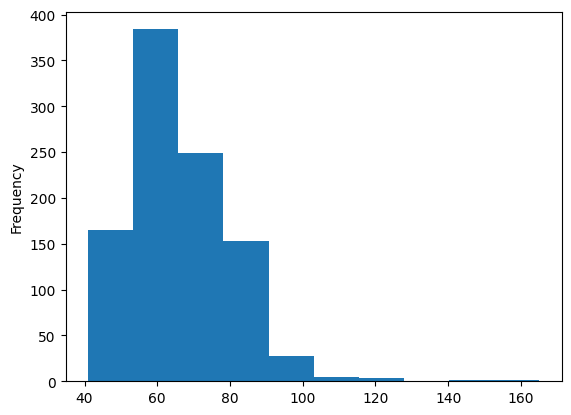

In [ ]:
response_df.Weight.plot.hist()
plt.show()

<font color="#0679c8">Podemos ver que los valores con mayor frecuencia se encuentran alrededor de los 60. Asimismo, podemos identificar los valores atípicos después del 100.</font>

3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [ ]:
#Calculo de asimetria :
response_df.Weight.skew()

1.2237251927527477

<font color="#0679c8">Tenemos una asimetría de 1.22, lo cual indica un sesgo positivo (hacia la derecha), como se pudo observar en el histograma.</font>

4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [ ]:
response_df.Weight.isna().sum()

20

<font color="#0679c8">Tiene 20 valores faltantes</font>

In [ ]:
# Missing Values * 100% / Total Values
# 20 * 100 / 1010
# 1.98
(response_df.Weight.isna().sum() * 100)/len(response_df.Weight)

1.9801980198019802

<font color="#0679c8">Representa el 2% </font>

5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas. NO olvides incluir las conclusiones del análisis con los resultados obtenidos.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [ ]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [ ]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

<font color="#0679c8">Análisis de Variables Numéricas</font>

Diagnosis Analysis of Missing Values for Age:


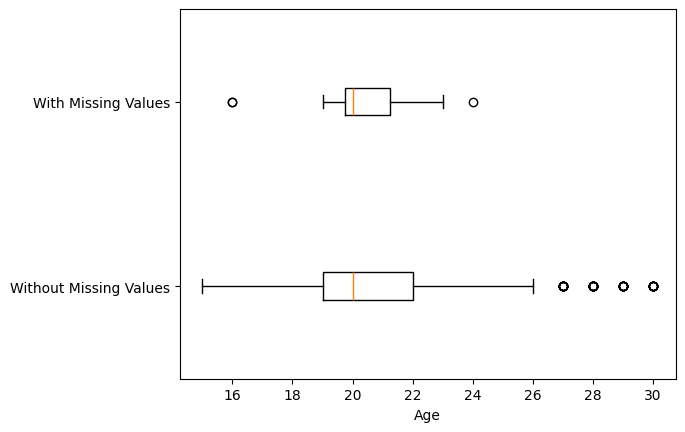

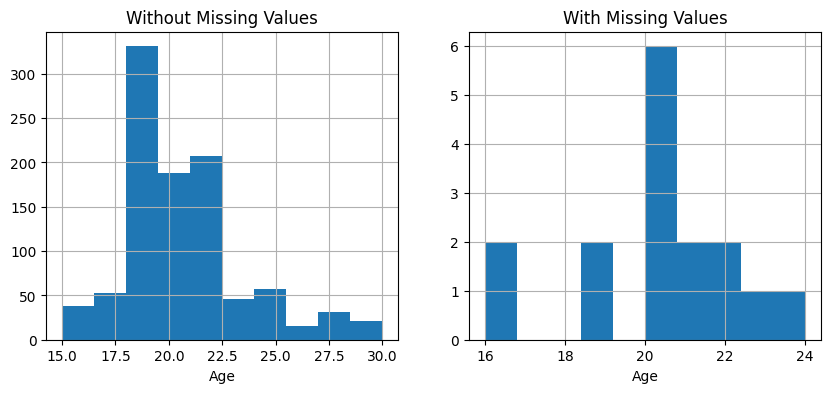

p-value of t-test: 0.7258243979822129
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Number of siblings:


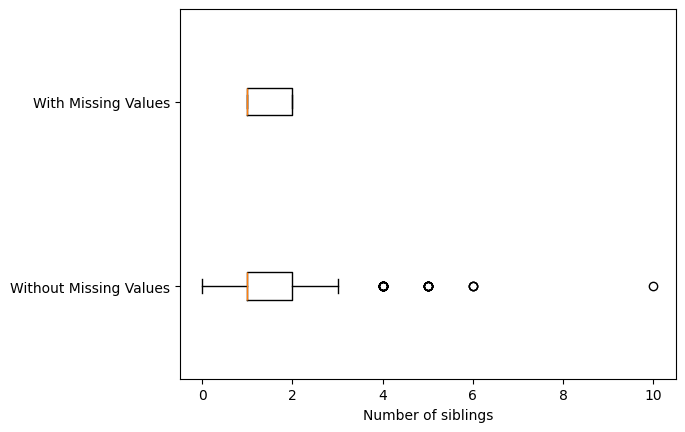

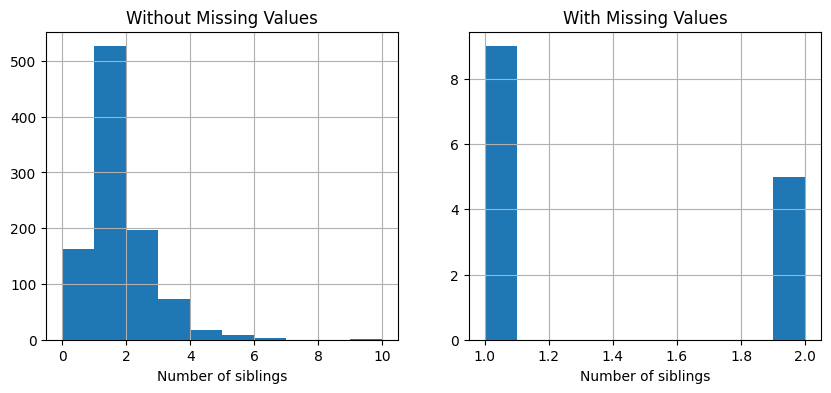

p-value of t-test: 0.8255092107556896
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [ ]:
numerical_attributes = ['Age', 'Number of siblings']

BM_MV = response_df.Weight.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(response_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

<font color="#0679c8">Análisis de Variables Categóricas </font>

Diagnosis Analysis of Missing Values for Gender:


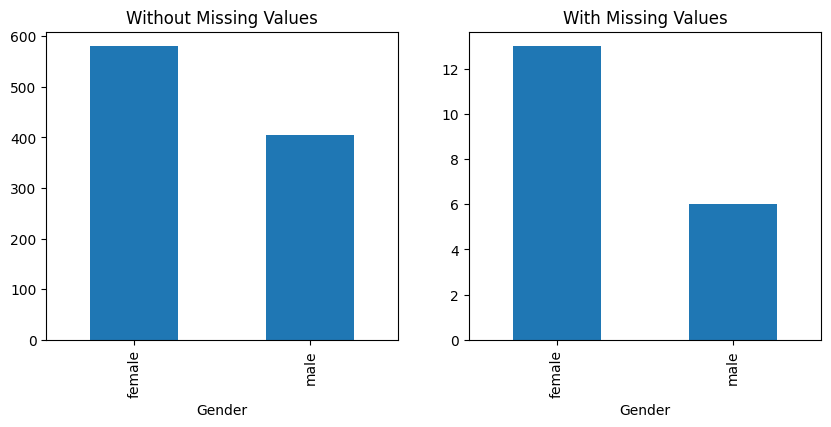

p-value of Chi_squared test: 0.5472167199163878
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Education:


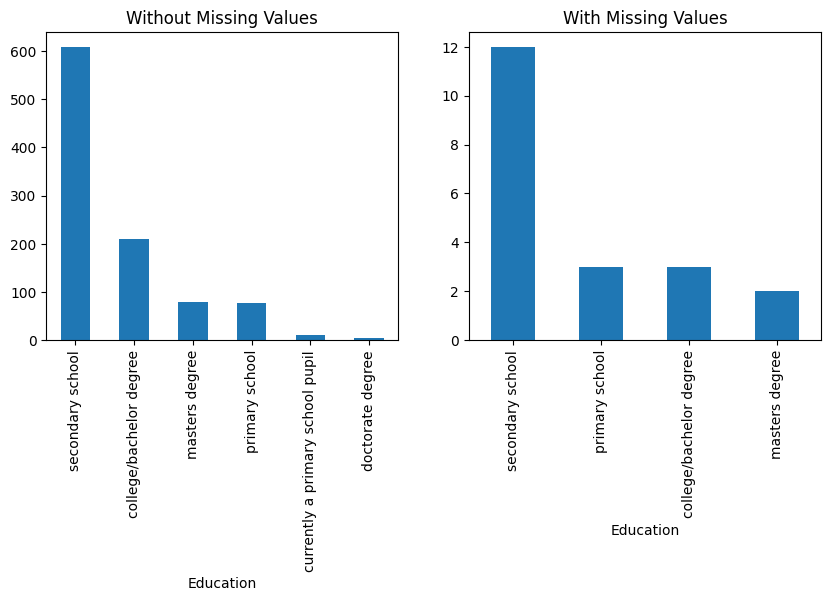

p-value of Chi_squared test: 0.8424822989541867
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [ ]:
categorical_attributes = ['Gender', 'Education']

for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(response_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

<font color="#0679c8"> Comencemos analizando el p-value, tenemos valores superiores a 0.05 y más cerca de 1 que de 0, lo cual nos indica que es más probable que se trate de valores MCAR o MAR. </font>

<font color="#0679c8"> Pero, si observamos las gráficas, las dos variables con menor p-value (Age y Gender) podrían tener una ligera relación. Se puede ver que hay una leve tendencia a que las mujeres de 20 años no registren su peso. </font>

<font color="#0679c8"> La muestra de datos faltantes parece ser muy pequeña para encontrar una relación significativa con el peso. </font>

6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

In [ ]:
response_df.Weight.fillna(response_df.Weight.median(),inplace=True)

<font color="#0679c8">Podríamos usar la media o la mediana, pero la mediana nos protege un poco más de los valores atípicos.</font>

In [ ]:
# Comprobamos que los valores faltantes sean 0
response_df.Weight.isna().sum()

0

7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

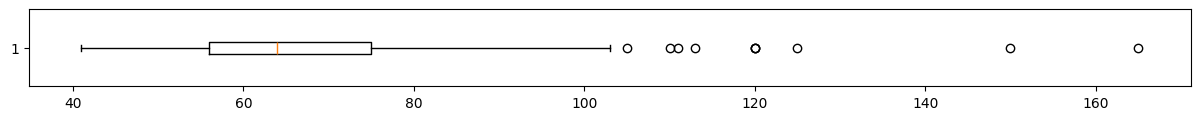

In [ ]:
plt.figure(figsize=(15, 1))
plt.boxplot(response_df.Weight, vert=False)
plt.show()

<font color="#0679c8">Sí, tenemos valores atípicos, aparentemente todos por encima del límite superior.</font>

In [ ]:
Q1 = response_df.Weight.quantile(0.25)
Q3 = response_df.Weight.quantile(0.75)
IQR = Q3-Q1

BM = (response_df.Weight > (Q3+1.5 *IQR)) | (response_df.Weight < (Q1-1.5 *IQR))
#Counting Outliers
response_df[BM].Weight.count()

10

<font color="#0679c8">Tenemos 10 valores atípicos</font>

In [ ]:
outliers_weight = response_df[BM].Weight
outliers_weight

,Weight
292,120.0
612,110.0
715,111.0
793,120.0
796,113.0
859,125.0
885,165.0
973,120.0
992,150.0
998,105.0


<font color="#0679c8">Almacenamos los valores atípicos en "outliers_weight".</font>

In [ ]:
response_df = response_df[~BM]
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


<font color="#0679c8">El resto de los valores los almacenamos en el DataFrame original.</font>

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

In [ ]:
# Llenar valores faltantes con la mediana
response_df.Height.fillna(response_df.Height.median(),inplace=True)
#Comprombar que los valores faltantes sean 0
response_df.Height.isna().sum()

<ipython-input-26-69d083d04f3f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  response_df.Height.fillna(response_df.Height.median(),inplace=True)
<ipython-input-26-69d083d04f3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df.Height.fillna(response_df.Height.median(),inplace=True)


0

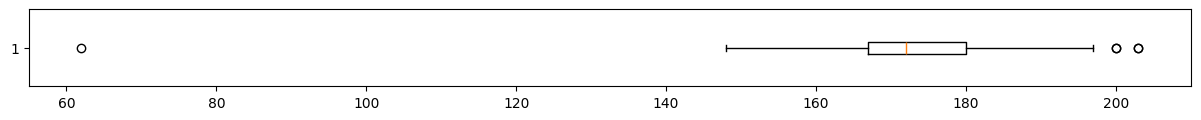

In [ ]:
#Graficamos la distribucion para detectar outliers
plt.figure(figsize=(15, 1))
plt.boxplot(response_df.Height, vert=False)
plt.show()

In [ ]:
#Detectamos Valores Atipicos
Q1 = response_df.Height.quantile(0.25)
Q3 = response_df.Height.quantile(0.75)
IQR = Q3-Q1

BM = (response_df.Height > (Q3+1.5 *IQR)) | (response_df.Height < (Q1-1.5 *IQR))
#Contamos Valores Atipicos
response_df[BM].Height.count()

5

In [ ]:
# Guardamos outliers en un DF distinto
outliers_height = response_df[BM].Weight
outliers_height

,Weight
97,75.0
220,90.0
547,80.0
676,55.0
799,89.0


In [ ]:
# Sobre escribimos el DF original sin outliers
response_df = response_df[~BM]
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

In [ ]:
#Calculamos BMI
response_df['BMI'] = (response_df.Weight / 100) / (response_df.Height ** 2)
response_df.BMI

<ipython-input-31-af7f15babcd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['BMI'] = (response_df.Weight / 100) / (response_df.Height ** 2)


,BMI
0,0.000018
1,0.000022
2,0.000022
3,0.000020
4,0.000020
...,...
1005,0.000021
1006,0.000024
1007,0.000025
1008,0.000019


In [ ]:
# Aseguramos que no haya valores faltantes
response_df.BMI.isna().sum()

0

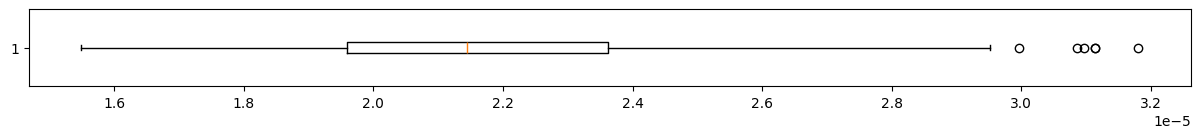

In [ ]:
#Visualizamos la distribucion de BMI
plt.figure(figsize=(15, 1))
plt.boxplot(response_df.BMI, vert=False)
plt.show()

In [ ]:
Q1 = response_df.BMI.quantile(0.25)
Q3 = response_df.BMI.quantile(0.75)
IQR = Q3-Q1

BM = (response_df.BMI > (Q3+1.5 *IQR)) | (response_df.BMI < (Q1-1.5 *IQR))
response_df.BMI[BM].count()

6

<font color="#0679c8"> Tenemos 6 valores atípicos en el BMI.</font>

10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

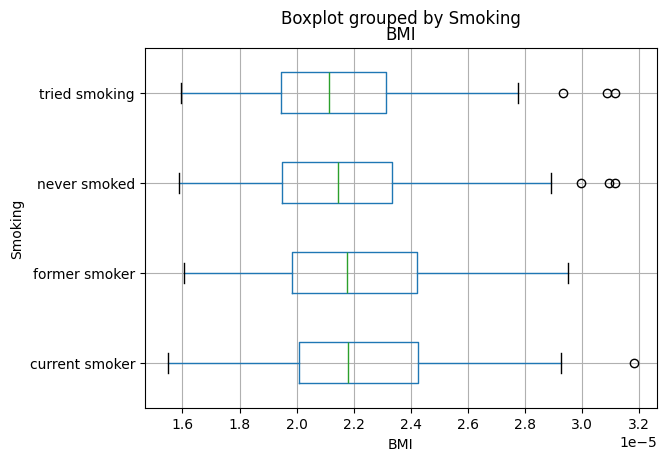

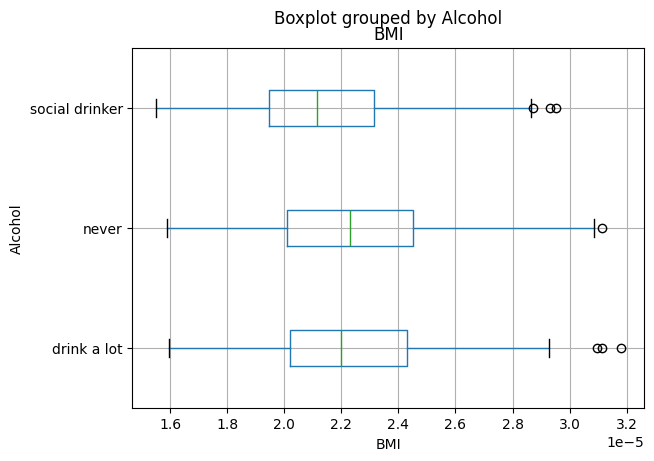

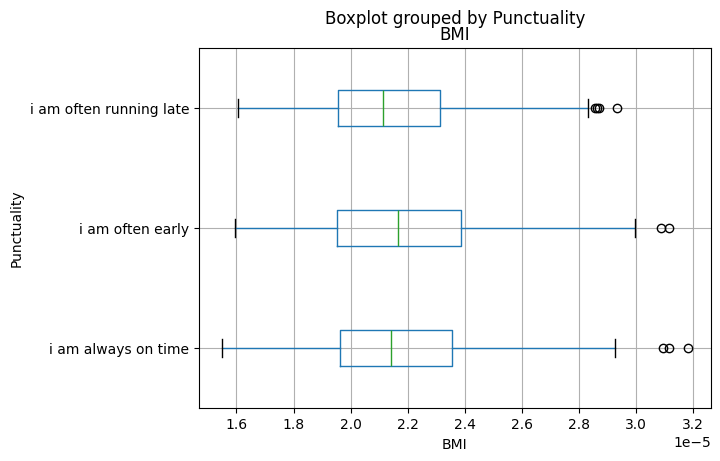

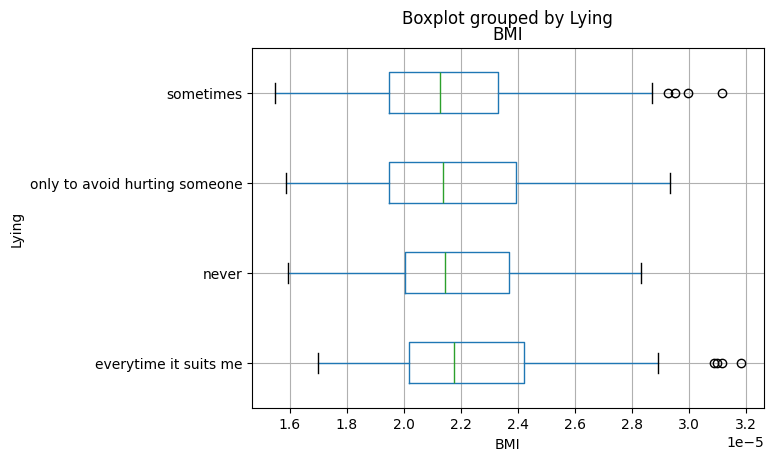

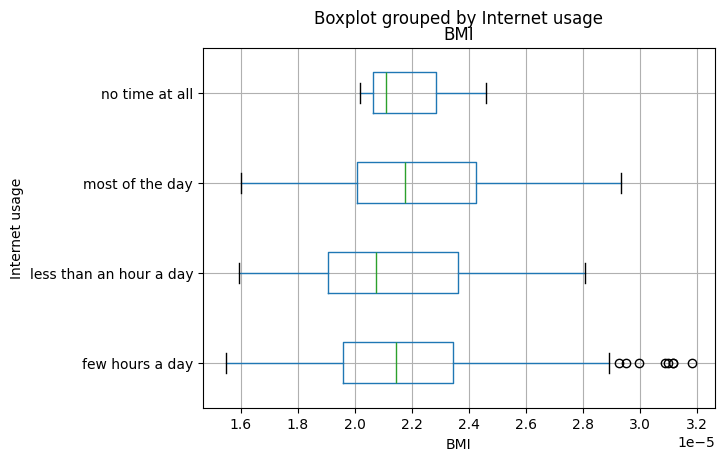

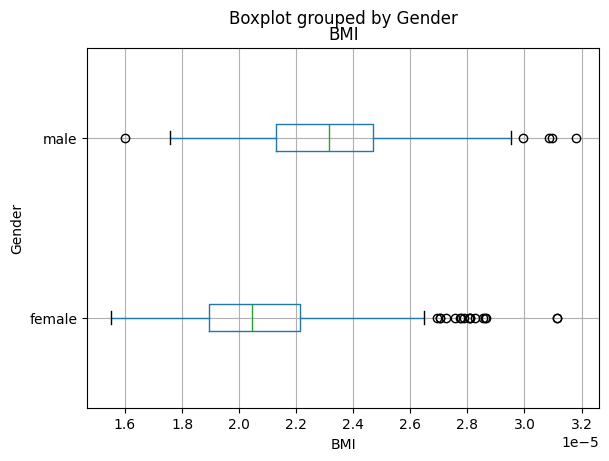

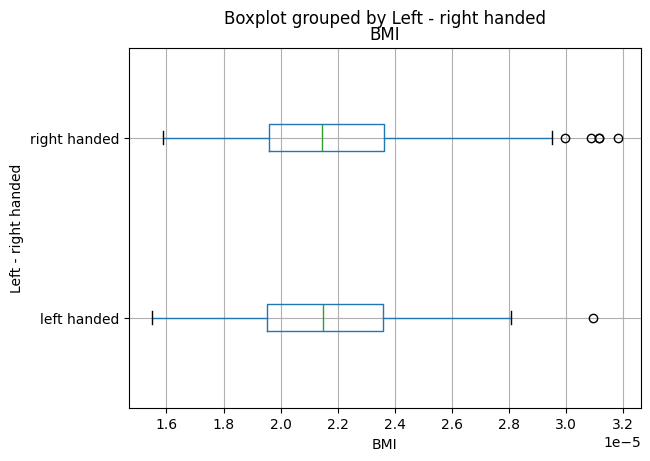

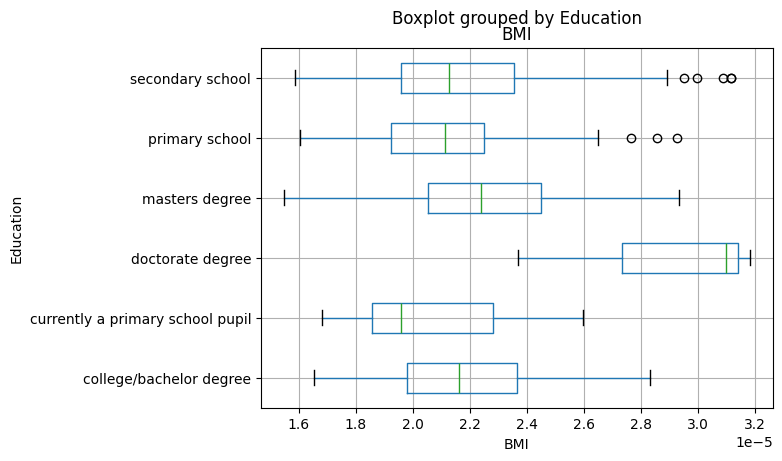

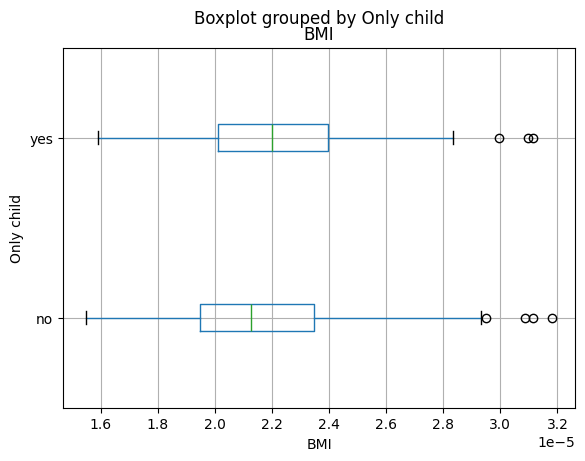

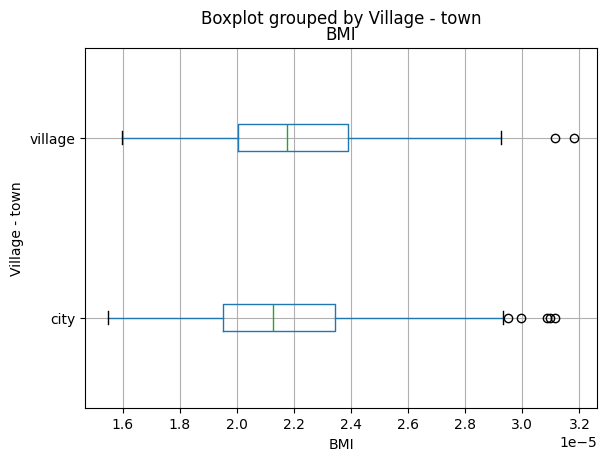

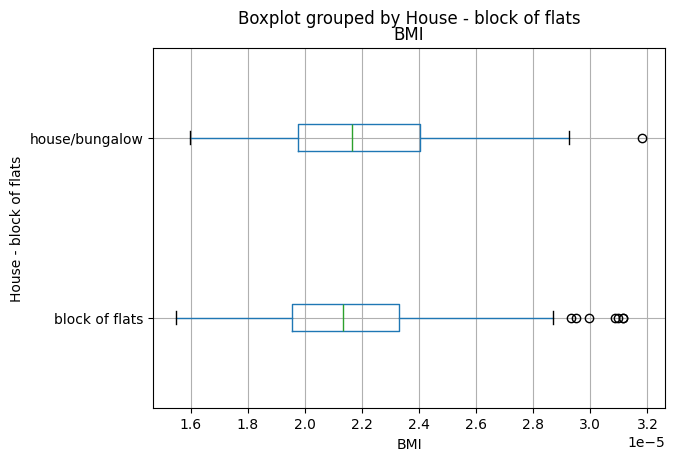

In [ ]:
categorical_columns = response_df.describe(include = 'object').T.index

for category in categorical_columns:
    response_df.boxplot(column='BMI', by=category, vert=False)
    plt.xlabel('BMI')
    plt.ylabel(category)
    plt.show()

<font color="#0679c8">Para los fumadores, observamos que el BMI aumenta conforme aumenta la frecuencia con la que se fuma, a excepción de los "no fumadores". Curiosamente, aquellos que intentaron fumar tienen un BMI más bajo.</font>

<font color="#0679c8">Para los consumidores de alcohol sucede algo similar: no hay una tendencia clara. Observamos que aquellos que nunca consumen alcohol tienen un BMI ligeramente más alto que los que beben mucho, y aquellos que beben socialmente están por debajo de ambos.</font>

<font color="#0679c8">Es interesante porque el BMI usualmente se usa como referencia para evaluar la salud de una persona, pero, al menos con estas dos muestras, podemos inferir que el peso y la altura no definen si alguien es saludable.</font>